In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pdb

# **Exploratory Data Analysis**

## Getting and exploring the data-set

**Training data-set is provided [here](https://drive.google.com/open?id=1JNyXs8CPbqneo99rGRJswIM7G1-Zsldp)**

In [2]:
# setting paths
data_dir = os.path.abspath('./_data')
train_data_fp = os.path.join(data_dir, 'data.csv')
os.listdir(data_dir)

['data.csv', 'test.csv']

In [3]:
# loading data-set
train_data = pd.read_csv(train_data_fp)
train_data.head()

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [4]:
print(f'Training data-set consists of {train_data.shape[0]} rows and {train_data.shape[1]} columns')

Training data-set consists of 616656 rows and 20 columns


**Rename column names for easier access:**

In [5]:
# renaming columns
original_col_names = list(train_data.columns)
modified_col_names = ['unnamed', 'episode', 'station', 'ch_type', 'season', 'year', 'date', 'weekday',
             'start_time', 'end_time', 'length', 'show_name', 'episode_name', 'genre', 'first_or_rerun', 
             'episodes_in_season', 'is_movie', 'overlaped_with_game', 'market_share', 'temperature']
train_data.columns = modified_col_names

## drop unnecessary column(s)
# 'episode' and 'show_name' columns are identical
train_data.drop(columns=['unnamed', 'episode'], inplace=True, errors='ignore')
train_data.head(2)

,station,ch_type,season,year,date,weekday,start_time,end_time,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,is_movie,overlaped_with_game,market_share,temperature
0,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125


## Exploratory Data Analysis

### Get insight about the target feature

In [6]:
train_data['market_share'].describe()

count    616656.000000
mean          3.011562
std           4.919562
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: market_share, dtype: float64

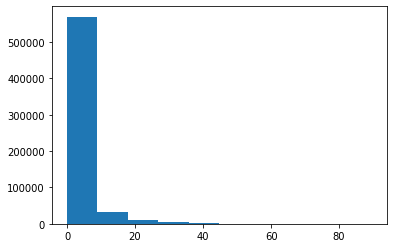

In [7]:
plt.hist(train_data['market_share'], bins=10)
plt.show()

Since the traget feature ('market_share') is continues, I create a new categorical feature based on it's mean value to be able to research it's relation with other features .

In [8]:
train_data['market_share_gt_mean'] = list(map(int, train_data['market_share'] > train_data['market_share'].mean()))  # store bool values as 0 and 1
train_data[7:10]

,station,ch_type,season,year,date,weekday,start_time,end_time,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,is_movie,overlaped_with_game,market_share,temperature,market_share_gt_mean
7,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 11:30:00,2016-08-29 12:30:00,4,Révolution,NaN,Ongoing Dramatic Series,No,Yes,No,No,1.4,19.5500,0
8,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 12:30:00,2016-08-29 13:30:00,4,CSI: Miami,NaN,Ongoing Dramatic Series,No,Yes,No,No,7.5,20.4375,1
9,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 13:30:00,2016-08-29 14:30:00,4,CSI: Miami,NaN,Ongoing Dramatic Series,No,Yes,No,No,12.1,21.4000,1


In [9]:
bins = np.linspace(start=train_data['market_share'].min(), stop=train_data['market_share'].max(), num=10)
bins

array([ 0.        ,  9.94444444, 19.88888889, 29.83333333, 39.77777778,
       49.72222222, 59.66666667, 69.61111111, 79.55555556, 89.5       ])

In [10]:
def market_share_bin(row, bins):
    cat = 0
    for i, b in enumerate(bins[:-1]):
        if (row['market_share'] > b) and (row['market_share'] <= b+1):
            cat = i
    
    return cat

In [11]:
train_data['market_share_bin'] = train_data.apply(lambda x: market_share_bin(x, bins), axis=1)

### Handeling the missing values

In [12]:
train_data.isnull().sum()

station                      0
ch_type                      0
season                       0
year                         0
date                         0
weekday                      0
start_time                  43
end_time                    43
length                       0
show_name                    0
episode_name            222579
genre                        0
first_or_rerun               0
episodes_in_season           0
is_movie                     0
overlaped_with_game          0
market_share                 0
temperature              83344
market_share_gt_mean         0
market_share_bin             0
dtype: int64

In [13]:
def cols_with_null_values(dataframe):
    r"""Helper function for identifying columns with NaN value
    
    Parameters:
    -------------
        dataframe: pandas.DataFrame
    
    Returns:
    -------------
        List containing the name of columns which have NaN value
    """
    null_check = dataframe.isnull().sum()
    null_check = null_check[null_check > 0]
    
    return list(dict(null_check).keys())

In [14]:
null_cols = cols_with_null_values(dataframe=train_data)
null_cols

['start_time', 'end_time', 'episode_name', 'temperature']

**'start_time' and 'end_time' features**<br>
Since both features are related and exactly have 43 missing values, I should check to find out if both of them is missing on the same row or not.<br>
So, the below script returns the number of rows where both features are missing simultaneously.

In [15]:
len(train_data[(train_data['start_time'].isnull()) & (train_data['end_time'].isnull())])

43

The calculated value (43) confirms that both features are missing at the same time.<br>
We can use `start_time` and `end_time` to calculate the show time. After that we can fill the missing values for `time` feature with the column's mean and then drop the `start_time` and `end_time` features.

In [16]:
def get_running_time(row):
    r"""Helper function to calculate length of a show.
    
    Parameters:
    -------------
        row: a pandas.DataFrame row
        
    Returns:
    -------------
        float: show length
    """
    start = pd.to_datetime(row['start_time'])
    end = pd.to_datetime(row['end_time'])

    return (end - start).seconds / 60

In [17]:
# apply the helper function and store the values in a new column
train_data['time'] = train_data.apply(lambda x: get_running_time(x), axis=1)

In [18]:
# fill time feature missing value with the mean
train_data['time'].fillna(value=train_data['time'].mean(), inplace=True)
# drop 'start_time' and 'end_time' columns
train_data.drop(columns=['start_time', 'end_time'], inplace=True, errors='ignore')

In [19]:
# boolean indicator to know if a row had 'episode_name' or not
train_data['episode_name'] = train_data['episode_name'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [20]:
# boolean indicator to know if the row had 'temperature' or not
train_data['temperature_recorded'] = train_data['temperature'].apply(lambda x: 0 if pd.isnull(x) else 1)
# fill temperature feature missing values with the mean
train_data['temperature'].fillna(train_data['temperature'].mean(), inplace=True)

In [21]:
train_data.isnull().sum()

station                 0
ch_type                 0
season                  0
year                    0
date                    0
weekday                 0
length                  0
show_name               0
episode_name            0
genre                   0
first_or_rerun          0
episodes_in_season      0
is_movie                0
overlaped_with_game     0
market_share            0
temperature             0
market_share_gt_mean    0
market_share_bin        0
time                    0
temperature_recorded    0
dtype: int64

**No more missing values.**

### Extracting information from `date` feature

In [23]:
from fastai.str

### Dealing with categorical data

In [22]:
train_data.head()

,station,ch_type,season,year,date,weekday,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,is_movie,overlaped_with_game,market_share,temperature,market_share_gt_mean,market_share_bin,time,temperature_recorded
0,V Total,General Channel,Fall,2016,2016-08-29,Monday,8,Vidéoclips V,0,Music Video Clips,No,Yes,No,No,0.9,20.400,0,0,120.0,1
1,V Total,General Channel,Fall,2016,2016-08-29,Monday,2,Apollo dans l'frigo,0,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125,0,0,30.0,1
2,V Total,General Channel,Fall,2016,2016-08-29,Monday,2,Infopublicité,0,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125,0,0,30.0,1
3,V Total,General Channel,Fall,2016,2016-08-29,Monday,4,"Infos, Les",0,News,No,Yes,No,No,1.7,18.125,0,0,60.0,1
4,V Total,General Channel,Fall,2016,2016-08-29,Monday,2,"Souper presque parfait, Un",0,Reality Programs,No,Yes,No,No,2.2,18.250,0,0,30.0,1


In [52]:
train_data.columns

Index(['station', 'ch_type', 'season', 'year', 'date', 'weekday', 'start_time',
       'end_time', 'length', 'show_name', 'episode_name', 'genre',
       'first_or_rerun', 'episodes_in_season', 'is_movie',
       'overlaped_with_game', 'market_share', 'temperature'],
      dtype='object')

In [ ]:
cat_cols = ['episode', 'station', 'ch_type', 'season', 'weekday',]

In [30]:
train_data.groupby('market_share_bin').mean()

,year,length,episode_name,market_share,temperature,market_share_gt_mean,time,temperature_recorded
market_share_bin,,,,,,,,
0,2017.381813,3.202093,0.639641,2.879340,6.706943,0.265611,49.740915,0.864965
1,2017.341229,3.291184,0.613713,10.428299,6.711971,1.000000,51.548135,0.850045
2,2017.389539,3.396565,0.608119,20.346604,6.686636,1.000000,54.163934,0.872756
3,2017.325275,3.030769,0.285714,30.342418,7.398250,1.000000,48.707692,0.837363
4,2017.413043,7.467391,0.521739,40.291304,6.964700,1.000000,116.260870,0.978261
5,2017.333333,8.800000,0.466667,50.226667,4.935417,1.000000,138.866667,1.000000
6,2017.000000,8.000000,0.000000,60.500000,8.258333,1.000000,132.000000,1.000000
7,2017.000000,4.000000,0.000000,69.700000,-9.575000,1.000000,60.000000,1.000000


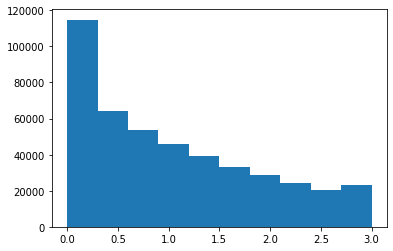

In [32]:
plt.hist(train_data[train_data['market_share_gt_mean'] == 0].loc[:, 'market_share'])
plt.show()

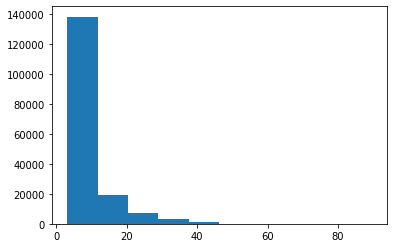

In [33]:
plt.hist(train_data[train_data['market_share_gt_mean'] == 1].loc[:, 'market_share'])
plt.show()

In [35]:
train_data.groupby('market_share_gt_mean').count()

,episode,station,ch_type,season,year,date,weekday,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,is_movie,overlaped_with_game,market_share,temperature,market_share_bin,time,temperature_recorded
market_share_gt_mean,,,,,,,,,,,,,,,,,,,,
0,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387,447387
1,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269,169269


In [26]:
len(train_data['genre'].unique())

27

In [36]:
len(train_data['weekday'].unique())

7

In [37]:
len(train_data['season'].unique())

4

In [38]:
len(train_data['ch_type'].unique())

2

In [39]:
train_data['ch_type'].unique()

array(['General Channel', 'Specialty Channel'], dtype=object)

In [235]:
train_data[train_data['market_share_gt_mean'] == 0]['temperature'].isnull().sum()

55839

In [236]:
train_data[train_data['market_share_gt_mean'] == 1]['temperature'].isnull().sum()

27505

In [242]:
len(train_data[(train_data['market_share_gt_mean'] == 0) & (train_data['episode_name'] == 0)])

153781

In [243]:
len(train_data[(train_data['market_share_gt_mean'] == 1) & (train_data['episode_name'] == 0)])

68798